In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import phyre
import torch
import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING) 

In [2]:
tier = 'ball'
eval_setup = 'ball_within_template'
fold_id = 0
random.seed(0)

### 1. Initialize the  Simulation Cache

In [3]:
train, dev, test = phyre.get_fold(eval_setup, fold_id)
print('Size of resulting splits:\n train:', len(train), '\n dev:',
      len(dev), '\n test:', len(test))

Size of resulting splits:
 train: 1600 
 dev: 400 
 test: 500


In [4]:
cache = phyre.get_default_100k_cache(tier)
print('cache.action_array shape:', cache.action_array.shape)

cache.action_array shape: (100000, 3)


### 2. Initialize the DQN Agent

In [5]:
from dqn import DQNAgent

DEBUG:root:test


In [6]:
agent = DQNAgent()

### 3. Train the Agent

In [7]:
state, statistic = agent.train(cache, train, tier, dev)

INFO:root:Preprocess the training data
INFO:root:Train set: size=117005756, solved_ratio=1.71%
INFO:root:Create evaluation data from train & dev
INFO:root:Start initializing the Model
INFO:root:Start Training the Model
/home/mynsng/anaconda3/envs/phyre/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
DEBUG:root:Iter: 1000, examples: 64000, mean loss: 0.315917, speed: 1.4 batch/sec, lr: 0.000300
DEBUG:root:Iter: 2000, examples: 128000, mean loss: 0.209643, speed: 1.4 batch/sec, lr: 0.000300
DEBUG:root:Iter: 3000, examples: 192000, mean loss: 0.183662, speed: 1.4 batch/sec, lr: 0.000300
DEBUG:root:Iter: 4000, examples: 256000, mean loss: 0.163386, speed: 1.4 batch/sec, lr: 0.000299
DEBUG:root:Iter: 5000, examples: 320000, mean loss: 0.157193, speed: 1.4 batch/sec, lr: 0.000299
DEBUG:root:Iter: 6000, examples: 384000, mean loss: 0.147064, speed: 1.4

In [83]:
#num = -2:

max_loss = statistic['max_loss']
print(max_loss[-10:])
min_loss = statistic['min_loss']
print(min_loss[-10:])
max_loss_index= statistic['max_loss_index']
print(max_loss_index[-10:])
min_loss_index= statistic['min_loss_index']
print(min_loss_index[-10:]) 
max_loss_action = statistic['max_loss_action']
print(max_loss_action[-10:])
min_loss_action = statistic['min_loss_action']
print(min_loss_action[-10:])
loss_var = statistic['loss_var']
print(loss_var[-10:])

i=7
a = max_loss_index[-10:][i].item()
b = max_loss_action[-10:][i].cpu().numpy()

print(a, b)

[0.3622957170009613, 1.5357636213302612, 1.8840168714523315, 1.8548859357833862, 2.8715736865997314, 1.2475779056549072, 0.1707039475440979, 5.706304550170898, 0.6154856085777283, 0.6105239391326904]
[0.00022416954743675888, 0.0001461137435398996, 0.0003073552215937525, 0.0002568325726315379, 0.0003214867028873414, 0.0002601119631435722, 0.00012793442874681205, 0.00044565682765096426, 0.00028285817825235426, 0.000206453594728373]
[tensor(525), tensor(1408), tensor(1525), tensor(1062), tensor(446), tensor(504), tensor(307), tensor(828), tensor(314), tensor(305)]
[tensor(202), tensor(80), tensor(1029), tensor(207), tensor(319), tensor(68), tensor(232), tensor(86), tensor(345), tensor(619)]
[tensor([0.0374, 0.7479, 0.2232], device='cuda:0'), tensor([0.6767, 0.5646, 0.5641], device='cuda:0'), tensor([0.8902, 0.4768, 0.3920], device='cuda:0'), tensor([0.6054, 0.5033, 0.8099], device='cuda:0'), tensor([0.5726, 0.2995, 0.7838], device='cuda:0'), tensor([0.5972, 0.9472, 0.1929], device='cuda:0

### Visualize

In [84]:
task_ids = [train[a]]
action = b
images, predict_images = agent.predict_qa(state, task_ids, tier, action)
images = images[1:11]

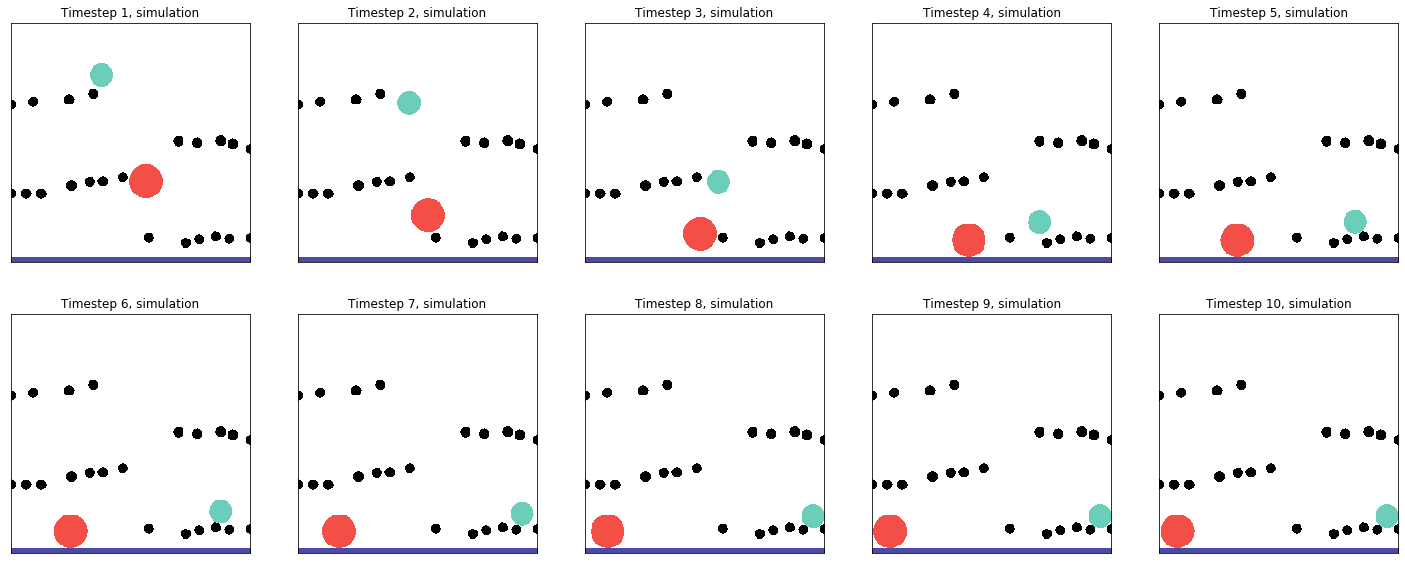

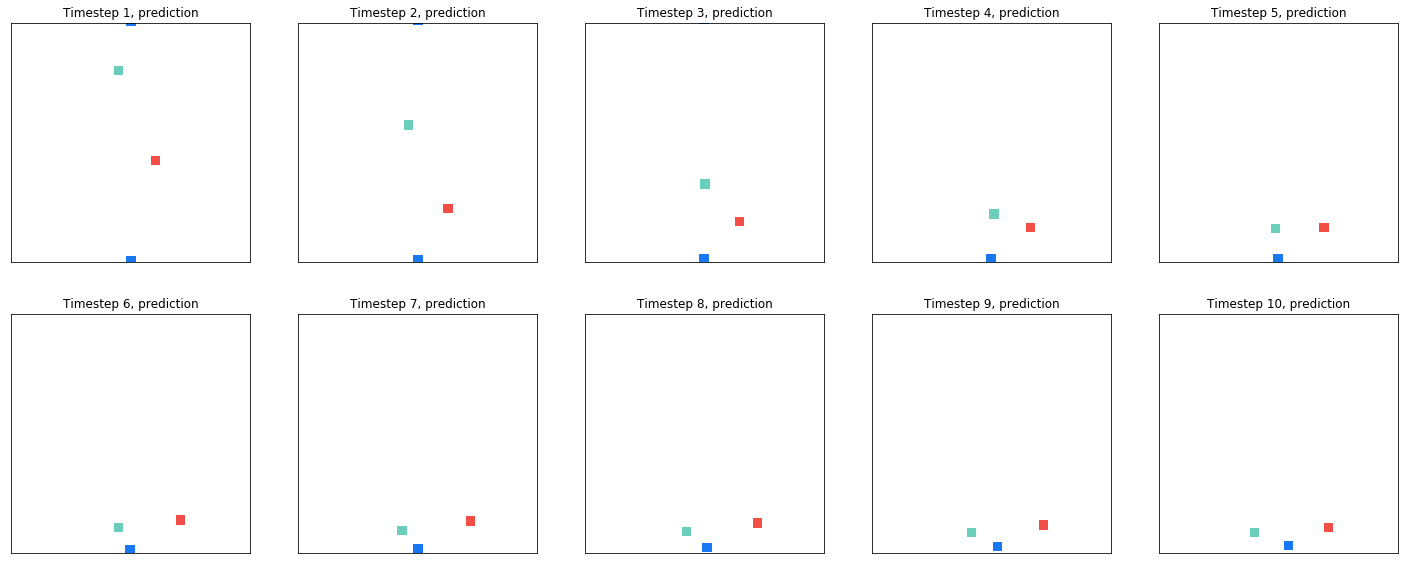

In [85]:
# plot할 개수 설정
fig1, axs1 = plt.subplots(2, 5, figsize=(20, 8))
fig1.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)

fig2, axs2 = plt.subplots(2, 5, figsize=(20, 8))
fig2.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)

# plot 해보리기~~
for i, (ax, image) in enumerate(zip(axs1.flatten(), images)):
    # Convert the simulation observation to images.
    img = phyre.observations_to_float_rgb(image)
    ax.imshow(img)
    
    ax.title.set_text(f'Timestep {i+1}, simulation')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    
for i, (ax, image) in enumerate(zip(axs2.flatten(), predict_images)):
    # Convert the simulation observation to images.
    img = phyre.observations_to_float_rgb(image)
    ax.imshow(img)
    
    ax.title.set_text(f'Timestep {i+1}, prediction')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

### 4. Evaluate the Agent

In [11]:
evaluator = agent.eval(state, test, tier)

#### 4.1 Percentage of solved tasks per number of attempts

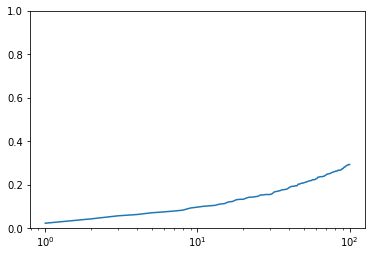

In [12]:
plt.plot(np.arange(phyre.MAX_TEST_ATTEMPTS)+1, evaluator.compute_all_metrics()['independent_solved_by'][1:])
plt.ylim(0,1)
plt.xscale('log')
plt.show()

#### 4.2 AUCESS

In [13]:
print('AUCESS after 100 attempts on test set', evaluator.get_aucess())

AUCESS after 100 attempts on test set 0.11201789801761751
